In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd 
import contextily as cx

/Users/augustinboissier/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/rg/74dsr5_92j18cf06x1nx5dcw0000gn/T/ipykernel_20907/2131994360.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2

In [2]:
import glob 

In [32]:
crash_files = glob.glob("Crashes/*")
crime_files = glob.glob("Traffic*/*")

df = pd.read_csv(crime_files[0])
gpdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat),crs={'init': 'epsg:3857'})
df2 = pd.read_csv(crime_files[1])
gpdf2 = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.lng, df2.lat),crs={'init': 'epsg:3857'})
df_pop = pd.read_csv("Traffic,Investigations_Other/philadelphia_population_metrics.csv")

zillow = gpd.read_file("neighborhoods.geojson")
loc = gpd.sjoin(gpdf2, zillow, op='within', how='left')

In [42]:
df_pop["GEOGRAPHY_NAME"] = df_pop["GEOGRAPHY_NAME"].astype(float)

In [47]:
df_pop["lat"] = df_pop["GEOGRAPHY_NAME"].apply(lambda x:gpdf2[gpdf2["fips"]==10*x]["lat"])
df_pop["lng"] = df_pop["GEOGRAPHY_NAME"].apply(lambda x:gpdf2[gpdf2["fips"]==10*x]["lng"])

ValueError: Columns must be same length as key

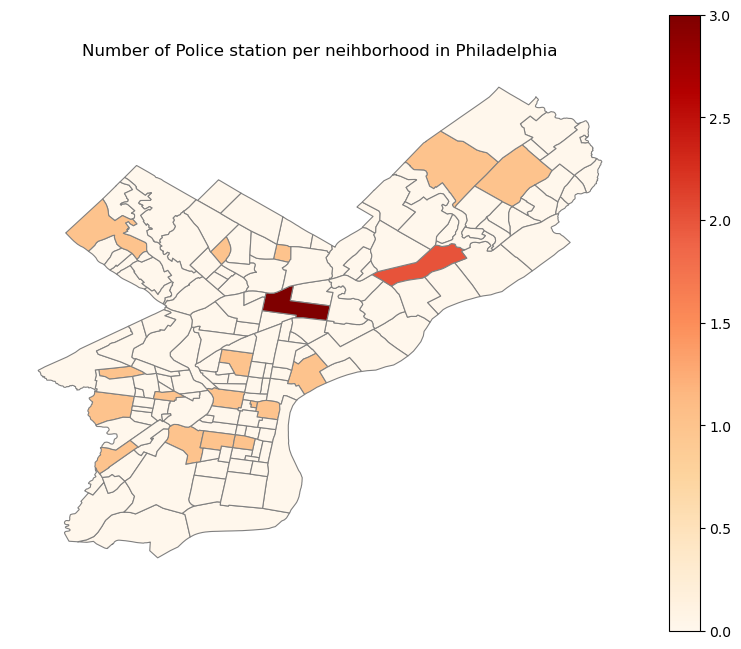

In [4]:
import warnings 
warnings.filterwarnings('ignore')

zillow = gpd.read_file("neighborhoods.geojson")
joined = gpd.sjoin(gpdf, zillow, op='within', how='left')
totals = joined.groupby('ZillowName', as_index=False).size()
totals = zillow.merge(totals, on='ZillowName')
totals.drop("geometry",inplace=True,axis=1)

merged = zillow.merge(totals, on='ZillowName', how = "left")
merged["size"].fillna(0,inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

merged.plot(
    ax=ax, 
    column="size", 
    edgecolor="grey", 
    linewidth=0.8, 
    legend=True, 
    cmap="OrRd"
)
plt.title("Number of Police station per neihborhood in Philadelphia")

# Format
ax.set_axis_off()
ax.set_aspect("equal")

Text(0.5, 1.0, 'Number of investigations per neighborhood in Philadelphia')

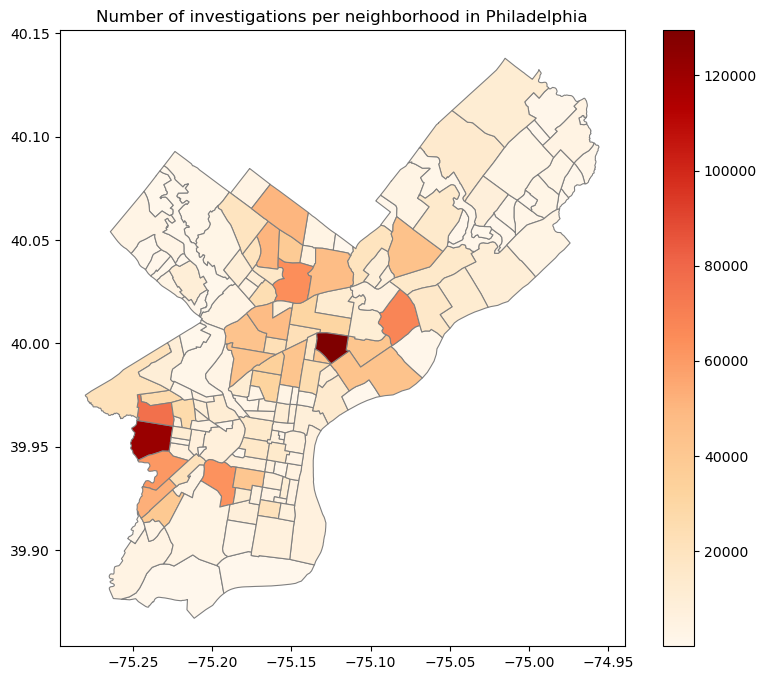

In [5]:
zillow = gpd.read_file("neighborhoods.geojson")
joined = gpd.sjoin(gpdf2, zillow, op='within', how='left')
joined = joined.groupby(['ZillowName'],as_index=False).count()[["ZillowName","index_right"]]

merged = zillow.merge(joined, on='ZillowName', how = "left")
merged["index_right"].fillna(0,inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

merged.plot(
    ax=ax, 
    column="index_right", 
    edgecolor="grey", 
    linewidth=0.8, 
    legend=True, 
    cmap="OrRd"
)

plt.title("Number of investigations per neighborhood in Philadelphia")

In [18]:
zillow = gpd.read_file("neighborhoods.geojson")
joined = gpd.sjoin(gpdf2, zillow, op='within', how='left')
joined = joined.groupby(['ZillowName'],as_index=False).count()[["ZillowName","index_right"]]

merged = zillow.merge(joined, on='ZillowName', how = "left")
merged["index_right"].fillna(0,inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

merged.plot(
    ax=ax, 
    column="index_right", 
    edgecolor="grey", 
    linewidth=0.8, 
    legend=True, 
    cmap="OrRd"
)

plt.title("Number of investigations per neighborhood in Philadelphia")

,DISTRICT_NUMBER,LOCATION,lat,lng,fips,geometry
0,7,Bustleton Ave & Bowler St,40.091030,-75.032680,4.210100e+11,POINT (-75.033 40.091)
1,14,Haines St & Germantown Ave,40.038425,-75.176942,4.210100e+11,POINT (-75.177 40.038)
2,8,Academy Rd & Red Lion Rd,40.081760,-74.994452,4.210200e+11,POINT (-74.994 40.082)
3,2,Harbison Ave & Levick St,40.031562,-75.063272,4.210100e+11,POINT (-75.063 40.032)
4,35,N Broad St & Champlost St,40.044428,-75.143506,4.210100e+11,POINT (-75.144 40.044)
5,15,Harbison Ave & Levick St,40.031562,-75.063272,4.210100e+11,POINT (-75.063 40.032)
6,5,Ridge Ave & Cinnaminson St,40.040228,-75.224375,4.210100e+11,POINT (-75.224 40.040)
7,39,22nd St & Hunting Park Ave,40.013292,-75.122935,4.210100e+11,POINT (-75.123 40.013)
8,25,3901 Whitaker Ave,40.009059,-75.120923,4.210100e+11,POINT (-75.121 40.009)
9,22,17th St & Montgomery Ave,39.980839,-75.162366,4.210100e+11,POINT (-75.162 39.981)


In [104]:
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import requests

def get_geography(geoid):
    # https://api.censusreporter.org/1.0/geo/tiger2016/16000US5367000?geom=true

    api_url = 'https://api.censusreporter.org/1.0/geo/tiger2016/{0}?geom=true'
    data = requests.get(api_url.format(geoid)).json()


    # Get Features
    fdf = pd.DataFrame({
                        'Geoid': geoid,
                        'LandArea': data['properties']['aland'] / 2589988,
                        'Population': data['properties']['population']
                        }, index=[0])
    fdf['PopulationDensity'] = fdf.Population / fdf.LandArea

    # Convert Points into Geopandas Geometry
    numpy_points =   np.array(data['geometry']['coordinates'][0])
    fdf['Geometry'] = Polygon(numpy_points)

    return gpd.GeoDataFrame(fdf, crs='epsg:4326', geometry = 'Geometry')

get_geography('86000US78666').plot()

KeyError: 'properties'

In [102]:
df_pop 

,OBJECTID,GEOGRAPHY_NAME,GEOGRAPHY,COUNT_ALL_RACES_ETHNICITIES,COUNT_WHITE_NH,COUNT_BLACK_NH,COUNT_ASIAN_NH,COUNT_HISPANIC,PERCENT_WHITE_NH,PERCENT_BLACK_NH,PERCENT_ASIAN_NH,PERCENT_HISPANIC,Shape__Area,Shape__Length
0,1,42101000100,Census tract,3478,2890,207,173,126,83.093732,5.951696,4.974123,3.622772,1.202257e+06,4528.078584
1,2,42101000200,Census tract,2937,665,284,1855,79,22.642152,9.669731,63.159687,2.689820,6.516548e+05,3688.958965
2,3,42101000300,Census tract,3169,2290,324,328,135,72.262543,10.224045,10.350268,4.260019,9.319655e+05,5040.148986
3,4,42101000401,Census tract,2125,1049,376,519,107,49.364706,17.694118,24.423529,5.035294,3.978075e+05,2733.448537
4,5,42101000402,Census tract,3142,2455,173,356,109,78.134946,5.506047,11.330363,3.469128,5.174244e+05,3547.054900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,42101980600,Census tract,0,0,0,0,0,NaN,NaN,NaN,NaN,2.189298e+06,8458.210568
380,381,42101980700,Census tract,5,0,3,1,1,0.000000,60.000000,20.000000,20.000000,1.278467e+07,19411.710980
381,382,42101980800,Census tract,6,4,1,0,0,66.666667,16.666667,0.000000,0.000000,3.700755e+06,16463.167578
382,383,42101980900,Census tract,30,9,18,0,2,30.000000,60.000000,0.000000,6.666667,3.498002e+07,40164.961498


In [100]:
pd.read_csv("Traffic,Investigations_Other/crimes.csv")

,objectid,psa,dispatch_date_time,dispatch_date,dispatch_time,location_block,text_general_code,lat,lng,fips
0,218891,2,2022-09-08 19:21:00+00,2022-09-08,15:21:00,3200 BLOCK N BROAD ST,Thefts,40.002741,-75.153068,4.210102e+11
1,218892,2,2022-09-14 21:41:00+00,2022-09-14,17:41:00,3200 BLOCK N BROAD ST,Thefts,40.002741,-75.153068,4.210102e+11
2,218893,2,2022-09-19 19:23:00+00,2022-09-19,15:23:00,3200 BLOCK N BROAD ST,Thefts,40.002741,-75.153068,4.210102e+11
3,218894,2,2022-08-22 13:38:00+00,2022-08-22,09:38:00,0 BLOCK WOLF ST,Theft from Vehicle,39.918351,-75.145999,4.210198e+11
4,218895,2,2022-08-20 14:31:00+00,2022-08-20,10:31:00,0 BLOCK WOLF ST,Theft from Vehicle,39.918351,-75.145999,4.210198e+11
...,...,...,...,...,...,...,...,...,...,...
1593137,7089185,1,2022-07-13 04:00:00+00,2022-07-13,00:00:00,2600 BLOCK HOLBROOK ST,Homicide - Criminal,39.914762,-75.235472,4.210101e+11
1593138,7089186,1,2022-07-17 04:00:00+00,2022-07-17,00:00:00,4200 BLOCK HOUGHTON ST,Homicide - Criminal,40.030447,-75.209204,4.210102e+11
1593139,7089187,1,2022-07-17 04:00:00+00,2022-07-17,00:00:00,3900 BLOCK L ST,Homicide - Criminal,40.006426,-75.103147,4.210102e+11
1593140,7089188,3,2022-07-19 04:00:00+00,2022-07-19,00:00:00,800 BLOCK E LOCUST ST,Homicide - Criminal,39.947066,-75.155190,4.210100e+11
